In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Alpha Vantage 

In [18]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='JHNRDQM3HA7WWF08', output_format='pandas')

In [74]:
data, meta_data = ts.get_intraday('GOOGL', interval='1min')
data = data.iloc[::-1]

In [76]:
# Only for 11/25/2020
data_Filter = data.loc[pd.Timestamp('11/27/2020'):]
data_Filter.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-11-27 11:18:00,1790.24,1791.80,1790.24,1791.80,1398.0
2020-11-27 11:19:00,1791.88,1792.08,1791.67,1792.00,1552.0
2020-11-27 11:20:00,1791.37,1791.70,1791.37,1791.70,1156.0
2020-11-27 11:21:00,1790.74,1791.40,1790.73,1790.73,1211.0
2020-11-27 11:22:00,1790.28,1790.28,1790.28,1790.28,523.0


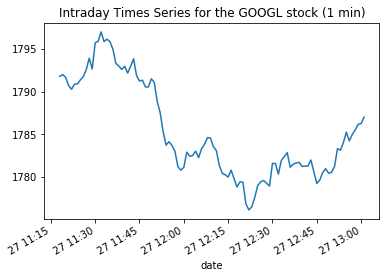

In [79]:
data_Filter['4. close'].plot()
plt.title('Intraday Times Series for the GOOGL stock (1 min)')
plt.show()

In [113]:
data_Daily, meta_data_Daily = ts.get_daily_adjusted('GOOGL')
data_Daily = data_Daily.iloc[::-1]

In [115]:
data_Daily.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-07-10,1513.25,1541.34,1500.72,1539.01,1539.01,1796063.0,0.0,1.0
2020-07-13,1549.94,1576.36,1506.56,1512.23,1512.23,2147729.0,0.0,1.0
2020-07-14,1492.79,1522.80,1485.93,1520.86,1520.86,1905405.0,0.0,1.0
2020-07-15,1523.23,1536.33,1497.83,1516.88,1516.88,1551326.0,0.0,1.0
2020-07-16,1501.50,1515.91,1488.27,1514.92,1514.92,1324228.0,0.0,1.0


# Time Series Decomp

Get the log returns

In [116]:
log_Ret = (np.log(data_Daily['4. close']) - np.log(data_Daily['4. close'].shift(1))).iloc[1:]
log_Ret = pd.DataFrame(log_Ret)
log_Ret

,4. close
date,
2020-07-13,-0.017554
2020-07-14,0.005691
2020-07-15,-0.002620
2020-07-16,-0.001293
2020-07-17,0.001273
...,...
2020-11-23,-0.005092
2020-11-24,0.020817
2020-11-25,0.000130


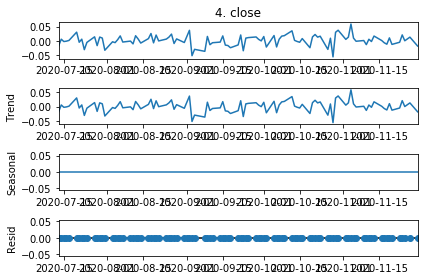

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(log_Ret['4. close'], model='additive', period=1)
result.plot()
plt.show()